#Exploratory Data Analysis (EDA)

Dataset link: [Bike Details Dataset](https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link)

---


In [ ]:
# Install gdown if not already available (for downloading dataset from Google Drive)
!pip install gdown -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset from Google Drive
!gdown 1iKy23bMtEQShF_weneRNnYrFmzvpPOI3 -O "Bike Details.csv"

# Load dataset
df = pd.read_csv("Bike Details.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Downloading...
From: https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3
To: /content/Bike Details.csv
100% 66.5k/66.5k [00:00<00:00, 41.4MB/s]
Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## Question 1
Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.  
Also show the shape and column names.

In [ ]:
# First 10 rows
display(df.head(10))

# Shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


## Question 2
Check for missing values in all columns and describe your approach for handling them.

In [ ]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Example: Fill numeric columns with median, categorical with mode (if needed)
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nAfter handling missing values:")
print(df.isnull().sum())

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

After handling missing values:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-13186491.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-13186491.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## Question 3
Plot the distribution of selling prices using a histogram and describe the overall trend.

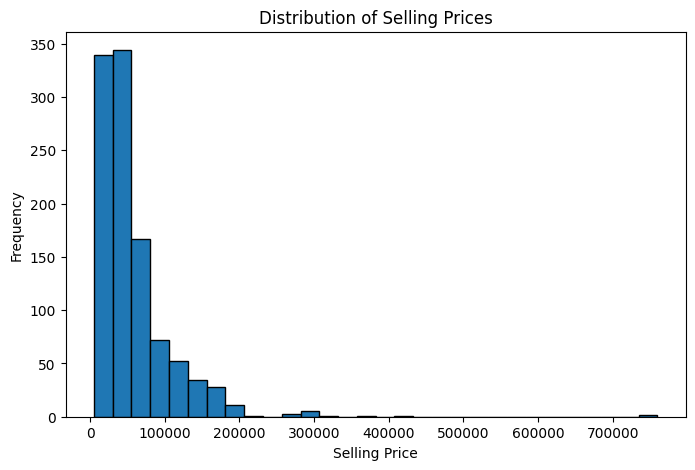

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

## Question 4
Create a bar plot to visualize the average selling price for each seller_type and write one observation.

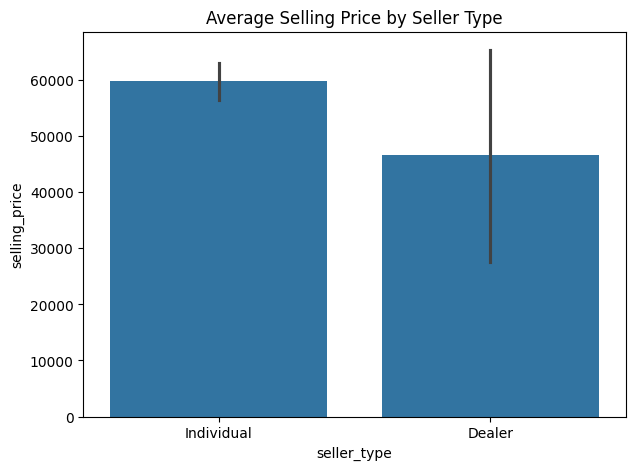

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='seller_type', y='selling_price', data=df, estimator=np.mean)
plt.title("Average Selling Price by Seller Type")
plt.show()

## Question 5
Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

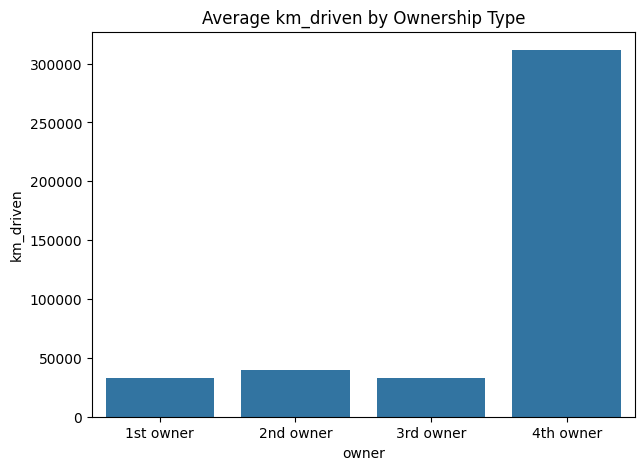

In [ ]:
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='owner', y='km_driven', data=avg_km)
plt.title("Average km_driven by Ownership Type")
plt.show()

## Question 6
Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [ ]:
# Before summary
print("Before outlier removal:")
print(df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nAfter outlier removal:")
print(df_no_outliers['km_driven'].describe())

Before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


## Question 7
Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

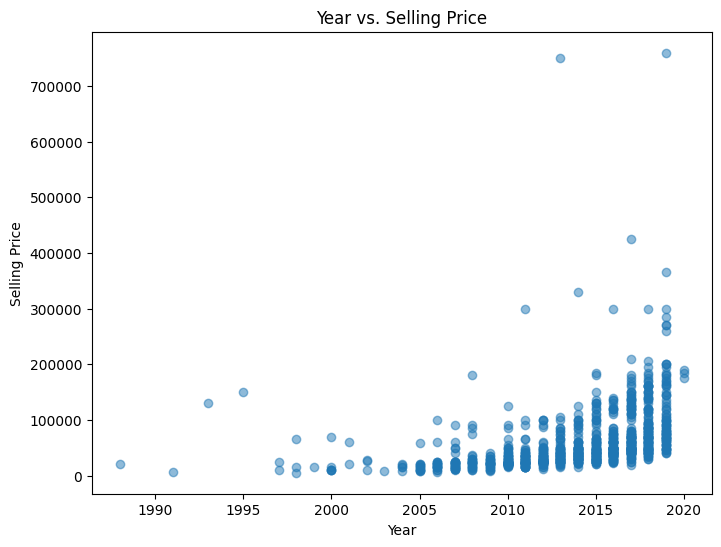

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title("Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

## Question 8
Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['seller_type'])
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,False,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,False,True


## Question 9
Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

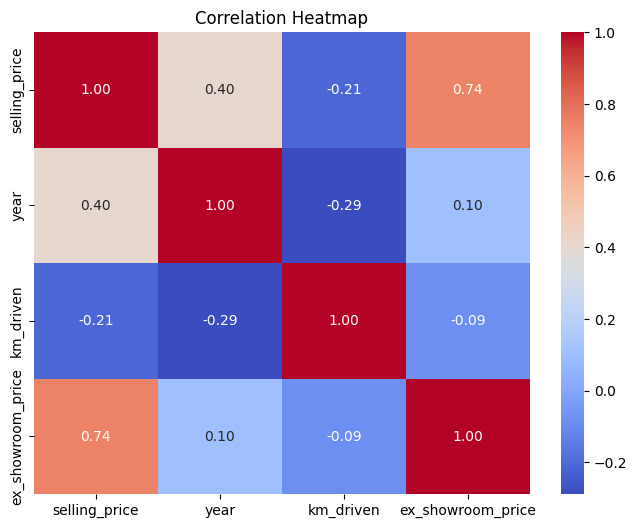

In [ ]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Question 10
Summarize your findings in a brief report:

- Important factors affecting selling price.  
- Data cleaning or feature engineering performed.

In [ ]:
print("""
Summary of Findings:
1. Selling price distribution is right-skewed, with most bikes priced lower but some very high values.
2. Seller type influences selling price (e.g., Dealer bikes tend to have higher average prices).
3. Ownership type affects km_driven; later owners usually have bikes with higher mileage.
4. Outliers were removed from km_driven using the IQR method for cleaner analysis.
5. Year shows a negative relation with bike price: newer bikes are generally more expensive.
6. Seller_type was encoded for modeling purposes.
7. Correlation heatmap shows strong correlation between year and price, and moderate correlations with km_driven.
""")


Summary of Findings:
1. Selling price distribution is right-skewed, with most bikes priced lower but some very high values.
2. Seller type influences selling price (e.g., Dealer bikes tend to have higher average prices).
3. Ownership type affects km_driven; later owners usually have bikes with higher mileage.
4. Outliers were removed from km_driven using the IQR method for cleaner analysis.
5. Year shows a negative relation with bike price: newer bikes are generally more expensive.
6. Seller_type was encoded for modeling purposes.
7. Correlation heatmap shows strong correlation between year and price, and moderate correlations with km_driven.

